<a href="https://colab.research.google.com/github/jeraldflowers/Classifier-Dog_Cats-keras/blob/main/cifar10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 14s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

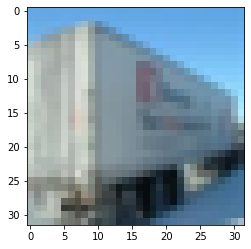

In [ ]:
plt.imshow(x_train[15])

## Data Cleaning

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
num_clases = len(np.unique(y_train))
y_train =  to_categorical(y_train, num_clases)
y_test =  to_categorical(y_test, num_clases)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## Normalization

In [ ]:
mean = np.mean(x_train)
std = np.std(x_train)

In [ ]:
x_train = (x_train - mean) / (std+1e-7)
x_test = (x_test - mean) / (std+1e-7)

In [ ]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print('x_train shape', x_train.shape)

print('train: ', x_train.shape[0])
print('val: ', x_valid.shape[0])
print('test: ', x_test.shape[0])

x_train shape (45000, 32, 32, 3)
train:  45000
val:  5000
test:  10000


In [ ]:
base_filtros = 32
w_regularizer = 1e-4

In [ ]:
model = Sequential()
## conv 1
model.add(Conv2D(base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizer), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

## conv 2
model.add(Conv2D(base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

## conv 3
model.add(Conv2D(2*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

## conv 4
model.add(Conv2D(2*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

## conv 5
model.add(Conv2D(4*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())

## conv 6
model.add(Conv2D(4*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regularizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))


## classification - flatten

model.add(Flatten())
model.add(Dense(num_clases, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [ ]:
datagen = ImageDataGenerator(rotation_range=15,
                   width_shift_range=0.1,
                   height_shift_range=0.1,
                   horizontal_flip=True,
                   vertical_flip=True)

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
#hist = model.fit(x_train, y_train, batch_size=32, epochs=100, 
#                 validation_data=(x_valid, y_valid),
#                 verbose=2, shuffle=True)

In [ ]:
checkpoint = ModelCheckpoint('mi_mejor_modelo.hdf5', verbose=1, save_best_only=True, monitor='val_accuracy')

In [ ]:
hist = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                 callbacks=[checkpoint],
                 steps_per_epoch=x_train.shape[0] // 128,
                 epochs=120,
                 verbose=2,
                 validation_data=(x_valid, y_valid)
                 )

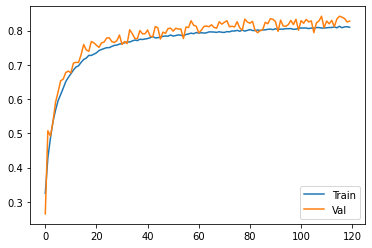

In [ ]:
plt.plot(hist.history['accuracy'], label='Train')
plt.plot(hist.history['val_accuracy'], label='Val')
plt.legend()
plt.show()

In [ ]:
model2 = model

In [ ]:
model2.load_weights('./mi_mejor_modelo.hdf5')

In [ ]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6559 - accuracy: 0.8299


[0.6558797955513, 0.8299000263214111]